<a href="https://colab.research.google.com/github/Rizkiramdani04/Portofolio_DS_DA/blob/main/Sentiment_Analysis_Dataset_Film.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv')
data.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
1,25000
0,25000


In [ ]:
train_reviews=data.review[:40000]
train_sentiment=data.sentiment[:40000]
test_reviews=data.review[40000:]
test_sentiment=data.sentiment[40000:]
print(train_reviews.shape,train_sentiment.shape)
print(test_reviews.shape,test_sentiment.shape)

(40000,) (40000,)
(10000,) (10000,)


In [ ]:
import nltk
nltk.download('stopwords')
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def strip_html(text):
  soup=BeautifulSoup(text,'html.parser')
  return soup.get_text()
def remove_between_square_brackets(text):
  return re.sub(r'\[[^][]*\]', '',text)
def denoise_text(text):
  text=strip_html(text)
  text=remove_between_square_brackets(text)
  return text
data['review']=data['review'].apply(denoise_text)

In [ ]:
def remove_special_characters(text,remove_digits=True):
  pattern=r'[^a-zA-z0-9\s]'
  text=re.sub(pattern,'',text)
  return text
data['review']=data['review'].apply(remove_special_characters)

In [ ]:
def simple_stemmer(text):
  ps=nltk.porter.PorterStemmer()
  text=' '.join([ps.stem(word) for word in text.split()])
  return text
data['review']=data['review'].apply(simple_stemmer)

In [ ]:
stop=set(stopwords.words('english'))
print(stop)
def remove_stopwords(text,is_lower_case=False):
  tokens=tokenizer.tokenize(text)
  tokens=[token.strip()for token in tokens]
  if is_lower_case:
    filtered_tokens=[token for token in tokens if token not in stopword_list]
  else:
    filtered_tokens=[token for token in tokens if token.lower() not in stopword_list]
  filtered_text=' '.join(filtered_tokens)
  return filtered_text
data['review']=data['review'].apply(remove_stopwords)

{'our', 'again', 'below', 'few', "we're", 'because', "don't", 'mightn', 'didn', 'isn', 'o', 'yours', 'before', 'she', "that'll", 'been', 'other', 'between', 'for', 'both', 'about', 'shan', 'll', 'from', "he'll", 'when', 'its', 'what', 'until', 'how', 'be', 'only', 'where', 'ma', 'than', 'these', 'but', 'does', 'out', "we'll", "they're", 'will', 'yourself', 'under', 'are', 'i', 'once', "should've", 'so', 'at', 'very', 'why', 'aren', "you've", "you'll", 'has', 've', 'through', "mustn't", 'being', 'wouldn', 'by', "needn't", 'were', "it'll", "she'd", 'into', 'my', 't', "you'd", 'over', 're', "wouldn't", 'same', 'their', 'further', 'do', 'off', "we'd", 'd', 'no', 'couldn', 'each', "wasn't", 'while', 'doesn', 'any', 'was', "i've", 'all', 's', 'hadn', 'me', "we've", 'ourselves', 'after', 'with', 'y', 'if', "it's", 'against', "couldn't", 'am', "haven't", 'in', 'hers', 'nor', 'won', 'own', 'mustn', 'them', "doesn't", "shouldn't", 'weren', 'just', 'theirs', 'he', "he'd", 'needn', 'her', 'his', '

In [ ]:
norm_train_reviews=data.review[:40000]
norm_train_reviews[0]

'famili normal watch local movi simpl reason poorli made lack depth worth timeth trailer nasaan ka man caught attent daughter law daughter took time watch thi afternoon movi exceed expect cinematographi wa veri good stori beauti act awesom jericho rosal wa realli veri good claudin barretto fact despis diether ocampo prove wa effect hi role never thi touch move affect local movi befor imagin cynic like dab eye end movi congratul star cinema way go jericho claudin'

In [ ]:
norm_test_reviews=data.review[40000:]
norm_test_reviews[45006]

'thought thi movi wa awesom two guy nick aaron hotti wish could watch love plot whole concept movi great wish tape last nightnick love'

In [ ]:
cv=CountVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))
cv_train_reviews=cv.fit_transform(norm_train_reviews)
cv_test_reviews=cv.transform(norm_test_reviews)
print(cv_train_reviews.shape,cv_test_reviews.shape)

(40000, 6992344) (10000, 6992344)


In [ ]:
tv=TfidfVectorizer(min_df=0.0,max_df=1.0,use_idf=True,ngram_range=(1,3))
tv_train_reviews=tv.fit_transform(norm_train_reviews)
tv_test_reviews=tv.transform(norm_test_reviews)
print(tv_train_reviews.shape,tv_test_reviews.shape)

(40000, 6992344) (10000, 6992344)


In [ ]:
lb=LabelBinarizer()
sentiment_data=lb.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [ ]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]
[[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]


In [ ]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42) # Changed penalty={'12'} to penalty='l2'
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[1 0 1 ... 0 0 1]
[1 0 1 ... 0 1 1]


In [ ]:
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print('lr_bow_score: ',lr_bow_score)
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print('lr_tfidf_score: ',lr_tfidf_score)

lr_bow_score:  0.8471
lr_tfidf_score:  0.8852


In [ ]:
#Classification report for bag of words
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.82      0.89      0.85      5013
    Negative       0.88      0.80      0.84      4987

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

              precision    recall  f1-score   support

    Positive       0.89      0.88      0.88      5013
    Negative       0.88      0.89      0.89      4987

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3987 1000]
 [ 529 4484]]
[[4444  543]
 [ 605 4408]]


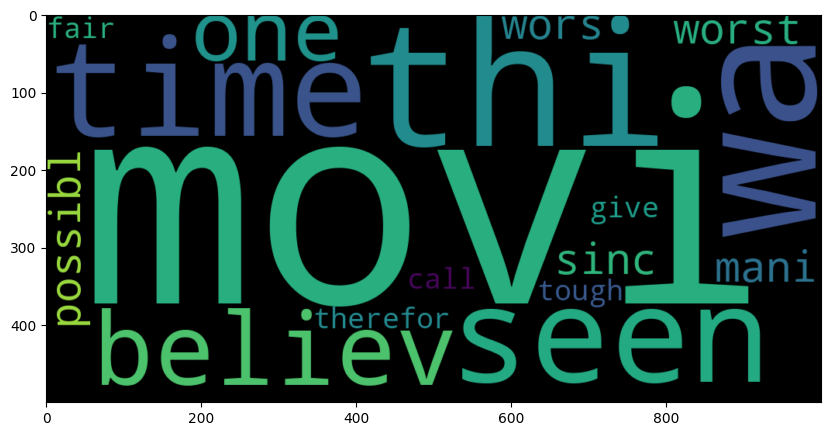

In [ ]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show()

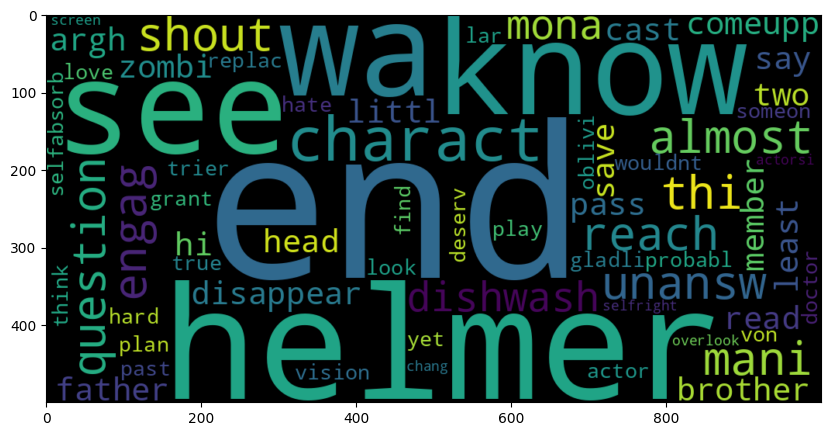

In [ ]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show()